In [2]:
import numpy as np
max_pad_len = 174

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [3]:
import pandas as pd
import os
import librosa

metadata = pd.read_csv('C:/dev/school/samples.csv')

features = []

for index, row in metadata.iterrows():    
    file_name = str(row["path"])
    class_label = row[1]
    data = extract_features(file_name)
    if data is not None:
        features.append([data, class_label])
    
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Error encountered while parsing file:  C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Crashes/BTDK_Crash_01.wav
Error encountered while parsing file:  C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Crashes/BTDK_Crash_04.wav
Error encountered while parsing file:  C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Percs/BTDK_Perc_02.wav
Error encountered while parsing file:  C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Percs/BTDK_Perc_03.wav
Error encountered while parsing file:  C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Percs/BTDK_Perc_04.wav
Error encountered while parsing file:  C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Percs/BTDK_Perc_05.wav
Error encountered while parsing file:  C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Percs/BTDK_Perc_06.wav
Error encountered while parsing fil

In [74]:
features

[[array([[-5.56712524e+02, -5.02511627e+02, -4.15173096e+02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-7.93147049e+01, -1.19778824e+02, -1.41122955e+02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 6.09004402e+01,  5.76947937e+01,  3.07980309e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 3.70758581e+00,  3.84591866e+00, -7.51226187e-01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-1.21767378e+00, -6.08407497e+00, -1.22175157e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-8.19549501e-01,  1.03702545e-01,  9.26485634e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype=float32),
  'Break'],
 [array([[-2.6936258e+02, -2.7340433e+02, -3.3765356e+02, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 2.9029919e+01,  1.9220009e+01, -2.2353220e+00, ...,
    

In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

Using TensorFlow backend.


In [5]:
x_test.shape

(136, 40, 174)

In [57]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

In [58]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [59]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 41, 64)         8256      
__________

In [60]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 200
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 541 samples, validate on 136 samples
Epoch 1/200
541/541 [==============================] - 2s 4ms/step - loss: 6.7212 - acc: 0.1627 - val_loss: 1.9058 - val_acc: 0.2721

Epoch 00001: val_loss improved from inf to 1.90584, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 2/200
541/541 [==============================] - 1s 2ms/step - loss: 4.5322 - acc: 0.2458 - val_loss: 2.2052 - val_acc: 0.3015

Epoch 00002: val_loss did not improve from 1.90584
Epoch 3/200
541/541 [==============================] - 1s 2ms/step - loss: 4.4168 - acc: 0.2458 - val_loss: 2.1492 - val_acc: 0.2941

Epoch 00003: val_loss did not improve from 1.90584
Epoch 4/200
541/541 [==============================] - 1s 2ms/step - loss: 3.8406 - acc: 0.2329 - val_loss: 2.0304 - val_acc: 0.2941

Epoch 00004: val_loss did not improve from 1.90584
Epoch 5/200
541/541 [==============================] - 1s 3ms/step - loss: 3.5110 - acc: 0.2440 - val_loss: 1.9190 - val_acc: 0.3235

Epoch 00005: val_loss 

Epoch 38/200
541/541 [==============================] - 1s 3ms/step - loss: 1.1719 - acc: 0.5767 - val_loss: 1.3939 - val_acc: 0.5221

Epoch 00038: val_loss improved from 1.43237 to 1.39390, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 39/200
541/541 [==============================] - 1s 3ms/step - loss: 1.2228 - acc: 0.5786 - val_loss: 1.3573 - val_acc: 0.5294

Epoch 00039: val_loss improved from 1.39390 to 1.35728, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 40/200
541/541 [==============================] - 1s 3ms/step - loss: 1.2034 - acc: 0.5841 - val_loss: 1.3353 - val_acc: 0.5441

Epoch 00040: val_loss improved from 1.35728 to 1.33527, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 41/200
541/541 [==============================] - 1s 3ms/step - loss: 1.2042 - acc: 0.5823 - val_loss: 1.3250 - val_acc: 0.5368

Epoch 00041: val_loss improved from 1.33527 to 1.32502, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 42

541/541 [==============================] - 2s 3ms/step - loss: 0.9640 - acc: 0.6728 - val_loss: 1.1914 - val_acc: 0.6103

Epoch 00076: val_loss did not improve from 1.19122
Epoch 77/200
541/541 [==============================] - 1s 3ms/step - loss: 0.9501 - acc: 0.6617 - val_loss: 1.1712 - val_acc: 0.6324

Epoch 00077: val_loss improved from 1.19122 to 1.17119, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 78/200
541/541 [==============================] - 1s 3ms/step - loss: 0.9627 - acc: 0.6488 - val_loss: 1.1600 - val_acc: 0.6471

Epoch 00078: val_loss improved from 1.17119 to 1.16004, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 79/200
541/541 [==============================] - 1s 3ms/step - loss: 0.9495 - acc: 0.6654 - val_loss: 1.1615 - val_acc: 0.6544

Epoch 00079: val_loss did not improve from 1.16004
Epoch 80/200
541/541 [==============================] - 1s 3ms/step - loss: 0.9828 - acc: 0.6396 - val_loss: 1.1763 - val_acc: 0.6324

Epoch 0008


Epoch 00116: val_loss improved from 1.08385 to 1.06922, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 117/200
541/541 [==============================] - 2s 3ms/step - loss: 0.8647 - acc: 0.7043 - val_loss: 1.0669 - val_acc: 0.6618

Epoch 00117: val_loss improved from 1.06922 to 1.06688, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 118/200
541/541 [==============================] - 2s 3ms/step - loss: 0.8769 - acc: 0.7024 - val_loss: 1.0812 - val_acc: 0.6544

Epoch 00118: val_loss did not improve from 1.06688
Epoch 119/200
541/541 [==============================] - 1s 3ms/step - loss: 0.8130 - acc: 0.7006 - val_loss: 1.0952 - val_acc: 0.6103

Epoch 00119: val_loss did not improve from 1.06688
Epoch 120/200
541/541 [==============================] - 1s 3ms/step - loss: 0.8304 - acc: 0.7079 - val_loss: 1.1050 - val_acc: 0.6176

Epoch 00120: val_loss did not improve from 1.06688
Epoch 121/200
541/541 [==============================] - 2s 3ms/step - loss:

Epoch 199/200
541/541 [==============================] - 1s 3ms/step - loss: 0.7038 - acc: 0.7412 - val_loss: 0.9246 - val_acc: 0.6618

Epoch 00199: val_loss improved from 0.92899 to 0.92460, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 200/200
541/541 [==============================] - 1s 3ms/step - loss: 0.7074 - acc: 0.7357 - val_loss: 0.9265 - val_acc: 0.6691

Epoch 00200: val_loss did not improve from 0.92460
Training completed in time:  0:04:49.955282


In [61]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.7504621068783476
Testing Accuracy:  0.6691176470588235


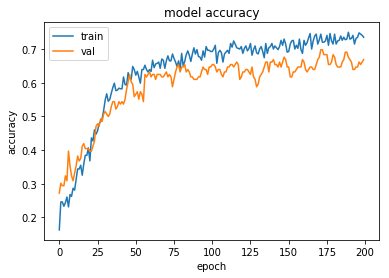

In [62]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('cnn_accuracy_epoch=200_dropout=05')
plt.show()

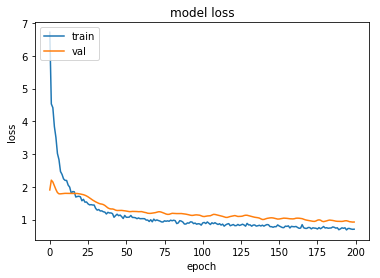

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('cnn_modelloss_epoch=200_dropout=05')
plt.show()